<a href="https://colab.research.google.com/github/HobbsJacob37/Data_Viz/blob/main/Jacob's_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jacob's Solutions

## Jupyter Notebooks and Python ##

Difficulty: ⭐⭐

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Questions 1-3 are done Before the start of work
4. Examine the dataset.

  (had to get a little creative to make the header line 0 instead of lableing like it showes in the book)



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/iris.csv',header = [0])

df

,SepalLength,SepalWidth,PedalLength,PedalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


5. Create a bar chart of the categorical variable
  
  (had to choose something othere than class and class because there are 50 of each and that would be a boring bar chart)

<Axes: title={'center': 'Classes of Iris Sepal Length'}, xlabel='Class', ylabel='Mean Sepal Length'>

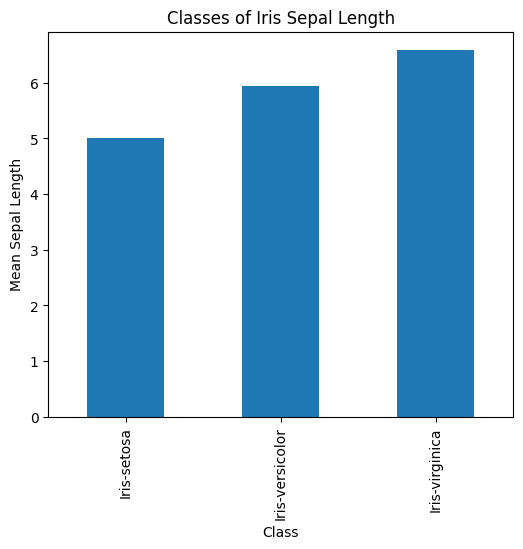

In [ ]:
dfg = df.groupby(['Class'])['SepalLength'].mean()

dfg.plot(kind='bar', title='Classes of Iris Sepal Length', ylabel='Mean Sepal Length',
         xlabel='Class', figsize=(6, 5))

6. Create visualizations of your favorite variable

<Axes: title={'center': 'Classes of Iris Pedal Length'}, xlabel='Class', ylabel='Mean Pedal Length'>

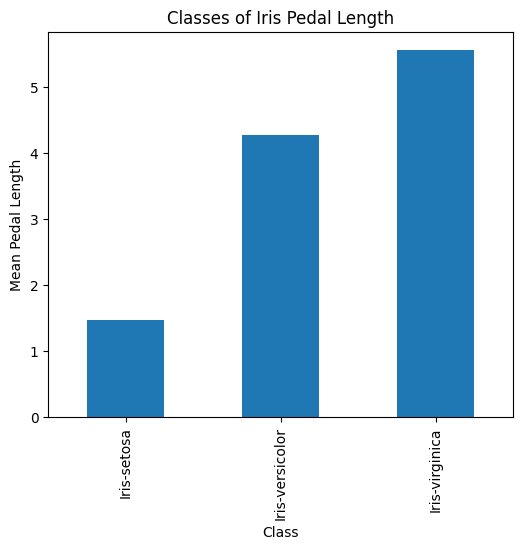

In [ ]:
dfg = df.groupby(['Class'])['PedalLength'].mean()

dfg.plot(kind='bar', title='Classes of Iris Pedal Length', ylabel='Mean Pedal Length',
         xlabel='Class', figsize=(6, 5))

7. Histogram

<Axes: ylabel='Frequency'>

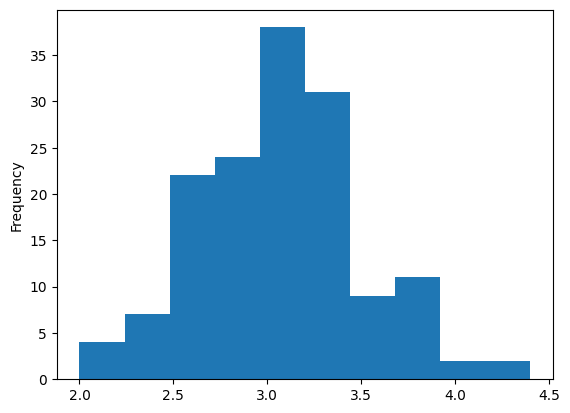

In [ ]:
df.SepalWidth.plot(kind = 'hist')

8. Box Plot

<Axes: xlabel='Class', ylabel='PedalLength'>

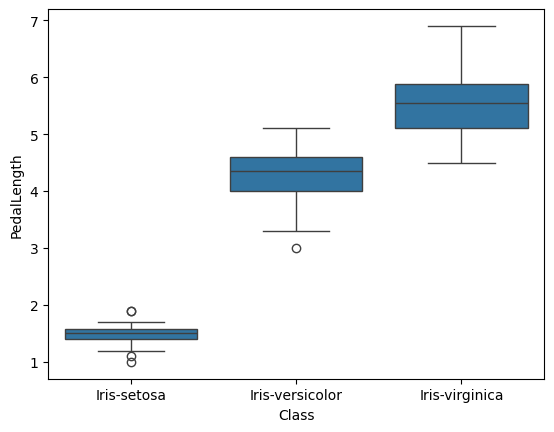

In [ ]:
sns.boxplot(y='PedalLength', x = 'Class', data = df)

<Axes: xlabel='colmuns', ylabel='value'>

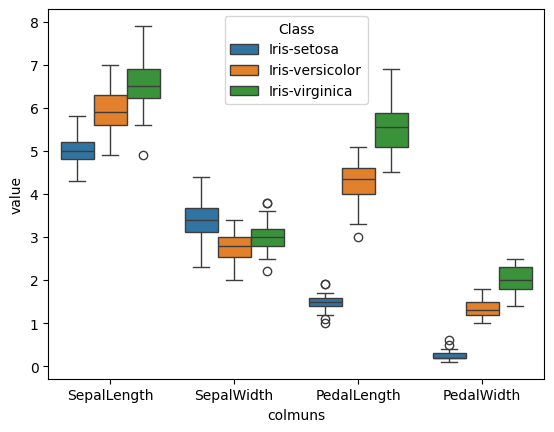

In [ ]:
df_melt = df.melt(id_vars = 'Class',
                  value_vars = ['SepalLength','SepalWidth','PedalLength','PedalWidth'],
                  var_name = 'colmuns')

sns.boxplot(x = 'colmuns',y='value',hue = 'Class',data = df_melt)

9. Violin

<ipython-input-69-935bb38336fd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.violinplot(data = df.drop(['SepalWidth','SepalLength'],1))


<Axes: >

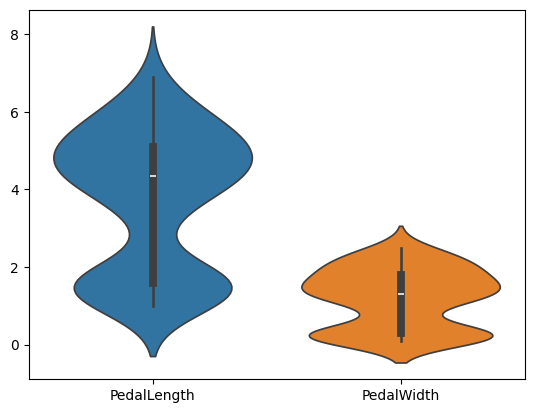

In [ ]:
sns.violinplot(data = df.drop(['SepalWidth','SepalLength'],1))

<Axes: ylabel='SepalLength'>

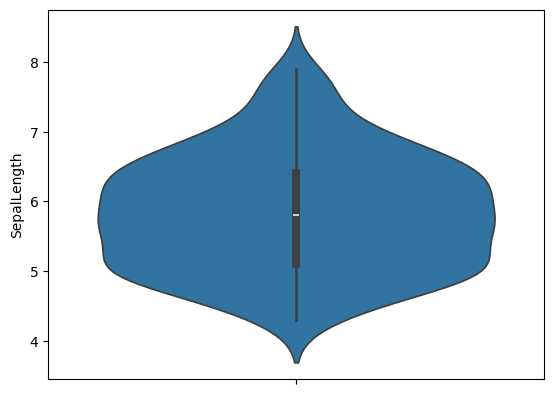

In [ ]:
sns.violinplot(data = df.SepalLength)

## Learning SQL with BigQuery ##

1. Start a notebook getting BigQuery to work. Feel free to use the authentication atop but you will need to create your own project. You should be able to follow the links at the top AND not have to enter a credit card.

Dificulty: ⭐⭐⭐⭐


In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


2. Navigate to the dataset ‘bigquery-public-data.austin_bikeshare.bikeshare_trips’

Dificulty: ⭐

In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT *
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,4163661,24 Hour Walk Up Pass,478,classic,2015-03-18 00:34:31+00:00,2564,5th & San Marcos,2562,8th/San Jacinto,9
1,30125269,Local31,21688,electric,2023-07-05 15:47:43+00:00,3790,Lake Austin Blvd/Deep Eddy,3790,East 6th/Medina,27
2,4149702,Local365,36,classic,2015-03-17 00:42:56+00:00,2540,17th/Guadalupe,2544,East 6th/Pedernales,20
3,4144959,24 Hour Walk Up Pass,558,classic,2015-03-16 16:49:18+00:00,3293,Barton Springs/Riverside,2550,Republic Square @ Guadalupe & 4th St.,35
4,4142940,24 Hour Walk Up Pass,772,classic,2015-03-16 15:35:34+00:00,2550,Republic Square @ Guadalupe & 4th St.,2576,Rainey @ River St,15


3. Compute how many entries are in the dataset

In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT
  COUNT(*) as total_rows
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows
0,2130009


4. Compute the longest trip from ‘duration_minutes'

  Wasn't difficult to find but I spent a lot of time confirming because I didn't beleave someone rented a bike for almost 24 days.

Difficulty ⭐

In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT
  MAX(duration_minutes) as longest_trip
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`

Query is running:   0%|          |

Downloading:   0%|          |

,longest_trip
0,34238


In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT
  start_time,start_station_name,end_station_name,subscriber_type,bike_id,MAX(duration_minutes) as trip_time
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
GROUP BY start_time,start_station_name,end_station_name,subscriber_type,bike_id
ORDER BY max(duration_minutes) desc

Query is running:   0%|          |

Downloading:   0%|          |

,start_time,start_station_name,end_station_name,subscriber_type,bike_id,trip_time
0,2019-08-07 22:25:19+00:00,Lakeshore/Pleasant Valley,Electric Drive/Sandra Muraida Way @ Pfluger Pe...,Single Trip Ride,893,34238
1,2023-06-02 18:03:46+00:00,Dean Keeton/Speedway,Dean Keeton/Park Place,Student Membership,278,25510
2,2020-04-11 08:52:26+00:00,2nd/Congress,Rosewood/Chicon,Single Trip (Pay-as-you-ride),89,22993
3,2023-03-03 14:56:09+00:00,6th/Chalmers,6th/Chalmers,24 Hour Walk Up Pass,370,22964
4,2023-08-06 09:04:41+00:00,Riverside/South Lamar,8th/Red River,Pay-as-you-ride,244G,21748
...,...,...,...,...,...,...
2130002,2021-12-08 15:00:10+00:00,Rainey/Cummings,Rainey/Cummings,Single Trip (Pay-as-you-ride),21735,2
2130003,2017-04-23 14:41:25+00:00,Rainey St @ Cummings,Rainey St @ Cummings,Local365,190,2
2130004,2017-05-28 16:05:22+00:00,Rainey St @ Cummings,Rainey St @ Cummings,Walk Up,513,2
2130005,2017-06-24 15:24:10+00:00,Rainey St @ Cummings,Rainey St @ Cummings,Walk Up,298,2


5. Compute the average time for a trip

Difficulty: ⭐

In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT
  AVG(duration_minutes) as average_trip
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`

Query is running:   0%|          |

Downloading:   0%|          |

,average_trip
0,29.293437


## SQL Essentials ##

1. Start a notebook getting BigQuery to work. Feel free to use the authentication atop.

2. Navigate to the dataset ‘austin_bikeshare.bikeshare_trips’

Difficulty: ⭐

In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT *
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,4163661,24 Hour Walk Up Pass,478,classic,2015-03-18 00:34:31+00:00,2564,5th & San Marcos,2562,8th/San Jacinto,9
1,30125269,Local31,21688,electric,2023-07-05 15:47:43+00:00,3790,Lake Austin Blvd/Deep Eddy,3790,East 6th/Medina,27
2,4149702,Local365,36,classic,2015-03-17 00:42:56+00:00,2540,17th/Guadalupe,2544,East 6th/Pedernales,20
3,4144959,24 Hour Walk Up Pass,558,classic,2015-03-16 16:49:18+00:00,3293,Barton Springs/Riverside,2550,Republic Square @ Guadalupe & 4th St.,35
4,4142940,24 Hour Walk Up Pass,772,classic,2015-03-16 15:35:34+00:00,2550,Republic Square @ Guadalupe & 4th St.,2576,Rainey @ River St,15


3. Compute the average time for a trip based on starting point

  This was easy because I learned it while confirming the max time in the last assignment

Dificulty: ⭐

In [5]:
%%bigquery --project my-project-data-vis-413602
SELECT
  start_station_name,AVG(duration_minutes) as average_trip
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
GROUP BY start_station_name
ORDER BY AVG(duration_minutes) desc

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,average_trip
0,East 5th/Shady Ln,197.470588
1,cesar Chavez/Congress,114.000000
2,Stolen,105.000000
3,Lakeshore & Pleasant Valley,71.895495
4,Lakeshore @ Austin Hostel,65.007563
...,...,...
196,Eeyore's 2017,14.000000
197,23rd/Pearl,13.823598
198,Re-branding,10.400000
199,Ready for deployment,9.767025


4. Compute how many trips start at each starting point.

Dificulty: ⭐⭐

In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT
  start_station_name,COUNT(*) as total_trips
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
GROUP BY start_station_name
ORDER BY COUNT(*) desc

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,total_trips
0,21st/Speedway @ PCL,92096
1,21st & Speedway @PCL,71145
2,Dean Keeton/Speedway,57666
3,Zilker Park,47713
4,21st/Guadalupe,38761
...,...,...
196,Eeyore's 2018,2
197,Mobile Station,1
198,Stolen,1
199,Eeyore's 2017,1


## SPL Sub-Queries ##


1. What was the second most popular starting station?

Difficulty: ⭐

In [ ]:
%%bigquery --project my-project-data-vis-413602
SELECT
  start_station_name,COUNT(*) as total_trips
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
GROUP BY start_station_name
ORDER BY COUNT(*) desc

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,total_trips
0,21st/Speedway @ PCL,92096
1,21st & Speedway @PCL,71145
2,Dean Keeton/Speedway,57666
3,Zilker Park,47713
4,21st/Guadalupe,38761
...,...,...
196,Eeyore's 2018,2
197,Mobile Station,1
198,Stolen,1
199,Eeyore's 2017,1


  According to the table 21st & Speedway @PCL is the second most popular

2. How many trips lasted over an hour and were a round trip (started and stopped at the same station)?

Spent way too much time finding out I could use AND

Difficulty: ⭐⭐⭐

In [6]:
%%bigquery --project my-project-data-vis-413602

SELECT
  start_station_name, duration_minutes
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE start_station_name = end_station_name AND duration_minutes>60


Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,duration_minutes
0,East 5th/Shady @ Eastside Bus Plaza,174
1,6th/Chalmers,176
2,Hollow Creek/Barton Hills,191
3,8th/Lavaca,368
4,East 11th/Victory Grill,267
...,...,...
68804,Boardwalk West,127
68805,Bullock Museum @ Congress & MLK,127
68806,Lakeshore/Austin Hostel,127
68807,Lakeshore/Austin Hostel,127


68613 trips were over an hour and were round trip.

## SQL Joins

Examine the average trip on Austin bike share grouping by property_type column from the bikeshare_stations table. Is average time on trips starting from ‘parkland’ longer than from ‘sidewalks’?

Took 5 hours 😠

Difficulty: ⭐⭐⭐⭐⭐

In [98]:
%%bigquery --project my-project-data-vis-413602

SELECT station.property_type, AVG(trip.duration_minutes) as avarage_time
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`as trip LEFT OUTER JOIN `bigquery-public-data.austin_bikeshare.bikeshare_stations` as station
      ON trip.start_station_name = station.name
WHERE trip.start_station_name = station.name AND (station.property_type = 'parkland' OR station.property_type = 'sidewalk' )
GROUP BY station.property_type

Query is running:   0%|          |

Downloading:   0%|          |

,property_type,avarage_time
0,sidewalk,31.275681
1,parkland,41.216286
